## Problemas de Clasificación

* El problema de regresion lo definimos como el proceso de aproximación de la relación de dependencia entre una variable dependiente $y$, y una variable independiente $x$.

* Definimos el problema de clasificación como el proceso de prediccion de una clase a la que pertencen las instancias

* Los algoritmos de clasificación entran en la categoria de aprendizaje supervisado. A cada instancia le correspone su etiqueta respectiva

* Ejemplos de problemas de clasificacion: 

1.   ¿comprará el cliente este producto? [sí, no]
2.   ¿tipo de tumor? [maligno, benigno]
3.   ¿es este comportamiento una anomalía? [sí, no]
4.   ¿nos devolverá este cliente un crédito? [sí, no]
5.   ¿qué deporte estás haciendo? tal y como lo detectan los relojes    inteligentes [caminar, correr, bicicleta, nadar]
7.   ¿obtendrá una historia un número alto de visitas en un navegador de noticias? [sí, no]

* Para la regresion logistica vamos a trabajar con los siguientes conjuntos de datos
\begin{equation}
      \begin{aligned}
      D = \bigl(\begin{smallmatrix} (x_{1},y_{1}),&...&,(x_{m},y_{m}) \end{smallmatrix}\bigr),\hspace{0.5em} donde\hspace{0.5em}\forall x_{i}\in\mathbb{R}^{n}, \forall y_{i} \in \{0,1\} \vee \{-1,1\}
      \end{aligned}
      \end{equation}





## Diferencia entre clasificacion y regresion

* El objetivo de la regresion logistica es que apartir de una entrada $x_{i}\in\mathbb{R}^{n}$ producir una salida $y_{i} \in \{0,1\}$


* Utilizaremos el modelo regresion multiple lineal para cada instancia $x_{i}$ 

 $f(x_{i},\theta) = \theta^{T} x_{i} + \theta_{0}\hspace{0.5em}(1)$

* Reenombramos  $f(x_{i},\theta)$ como z. Entonces  $z = \theta^{T} x_{i} + \theta_{0}$. Aplicamos la funcion sigmoide para restringir los valores de z entre 0 y 1. Entonces tenemos que:

 $ \hat y_{i} =  \frac{1}{1+e^{-z}} \hspace{0.5em}(2)$

* Definimos a la funcion de costo en todo el conjunto de entrenamiento como:

 $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}(y_{i}log(\hat y_{i}) + (1-y_{i})log(1-\hat y_{i})) \hspace{0.5em}(3)$




In [1]:
!pip install likelihood

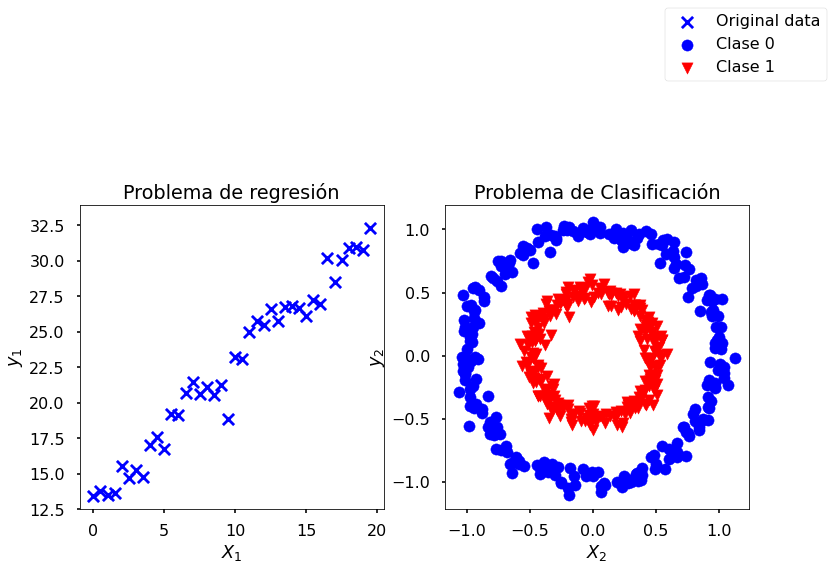

In [2]:
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.datasets import make_circles
 import likelihood as lp

 plt.rcParams['font.size'] = 24
 plt.style.use('seaborn-poster')

 x = np.arange(0, 20, 0.5) # Generamos valores x de 0 a 20 en intervalos de 0.5 -> [0,0.5,.....,15]
 y = (0.1*x + 1.25 + 0.1*np.random.randn(x.shape[0]))*10.0 # Calculamos y, a partir de la función que hemos generado
 
 ig, axs = plt.subplots(1, 2, figsize = (12, 10))
 
 axs[0].scatter(x,y, label='Original data', color='blue',marker = "x")
 axs[0].set_title('Problema de regresión')
 axs[0].set(xlabel='$X_{1}$', ylabel='$y_{1}$')
 axs[0].ticklabel_format(style='plain')
 axs[0].axis('square')

 n = 500
 p = 2
 
 X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
 Y = Y[:, np.newaxis]

 axs[1].scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1], label = "Clase 0", color = "blue", marker = "o")
 axs[1].scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1], label = "Clase 1", color = "red", marker = "v")
 axs[1].set_title('Problema de Clasificación')
 axs[1].set(xlabel='$X_{2}$', ylabel='$y_{2}$')
 axs[1].ticklabel_format(style='plain')
 ig.legend()
 axs[1].axis('square')
 ig.show()

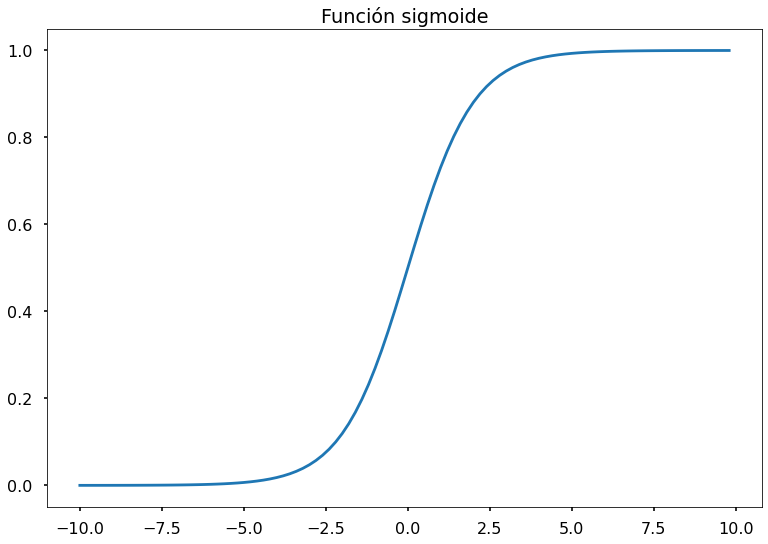

In [3]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return np.array(a)

def model_sigmoide(theta, x):
    return (sigmoid(x@theta))

def offset(prob, yhat):
    vec = []
    for i in range(yhat.shape[0]):
        if(yhat[i] < prob):
            vec.append(0)
        else:
            vec.append(1)
    vec = np.array(vec)
    vec = vec[np.newaxis, ...].T
    return(vec)

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x,sig)
plt.title("Función sigmoide")
plt.show()

In [4]:
x_input = np.array([X[:, 0], X[:, 1], np.sin(X[:, 0])**2, np.cos(X[:, 1])**2])
x_input.shape

(4, 500)

In [5]:
y_output = np.array(Y[:, 0])
theta = np.array([1.0, 1.0, 1.0, 1.0])

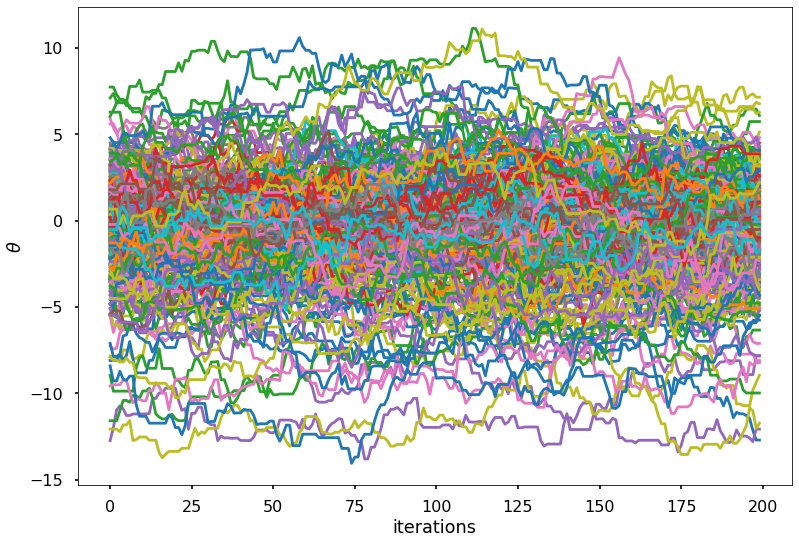

In [6]:
theta, error = lp.walkers(100, x_input, y_output, model_sigmoide, theta, mov=200, mode=False)

In [7]:
n = np.where(error == min(error))[0][0]

In [8]:
par = np.array(theta[n])

In [9]:
yhat = model_sigmoide(x_input, par)
yhat = yhat[np.newaxis, ...].T
yhat.shape

(500, 1)

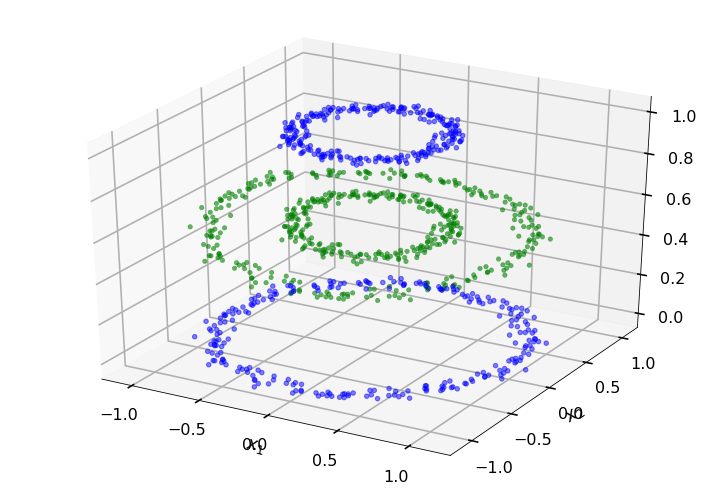

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_input[0, :], x_input[1, :], yhat, color = 'green', alpha = 0.6, label = 'Función Sigmoide')
ax.scatter(x_input[0, :], x_input[1, :], y_output, color='blue', alpha=0.5, linewidths=1, 
           label='Original data')
ax.set(xlabel = '$x_1$', ylabel = '$x_2$')
plt.show()

In [11]:
x_pred = np.array([0, 1])
x_pred = x_pred[np.newaxis, ...]
x_pred.shape

(1, 2)

In [12]:
optimo = np.array([-0.06111123, -0.08493201])

In [13]:
pred = offset(0.5, model_sigmoide(optimo, x_pred))[0]

In [14]:
print('La clase a la que pertenece es:', pred[0])

La clase a la que pertenece es: 0


##  Regresion Logística (Logistic Regression)

In [15]:
 import pandas as pd
 from sklearn import datasets
 from sklearn.linear_model import LogisticRegression
 iris = datasets.load_iris()

In [16]:
plt.rcParams['font.size'] = 24
plt.style.use('seaborn-poster')

In [17]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [18]:
xs = iris["data"][:, 2:]
petal_lenght = xs[:, 0]
petal_lenght = petal_lenght[..., np.newaxis]
petal_width = xs[:, 1]
petal_width = petal_width[..., np.newaxis]
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginia, else 0

In [19]:
petal_lenght.shape

(150, 1)

The dataset contains a set of 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. 

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="40%"
    alt="Iris versicolor"> 
</center>

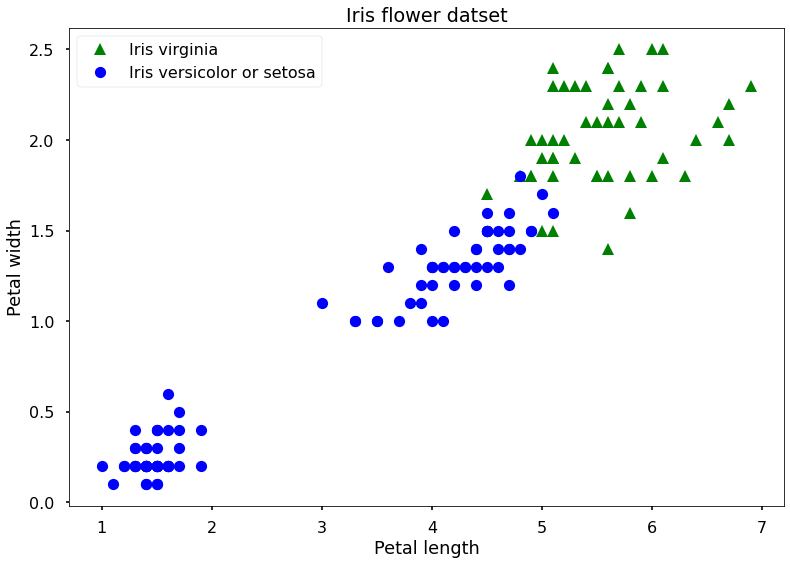

In [20]:
plt.plot(petal_lenght[y[:] == 1, :], petal_width[y[:] == 1, :], 'g^', label = 'Iris virginia')
plt.plot(petal_lenght[y[:] != 1, :], petal_width[y[:] != 1, :], 'bo', label = 'Iris versicolor or setosa')
plt.legend()
plt.title('Iris flower datset')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [21]:
log_reg = LogisticRegression()
log_reg.fit(petal_width, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
X_new = np.linspace(0, 3, 10000).reshape(-1, 1)

In [23]:
X_new.shape

(10000, 1)

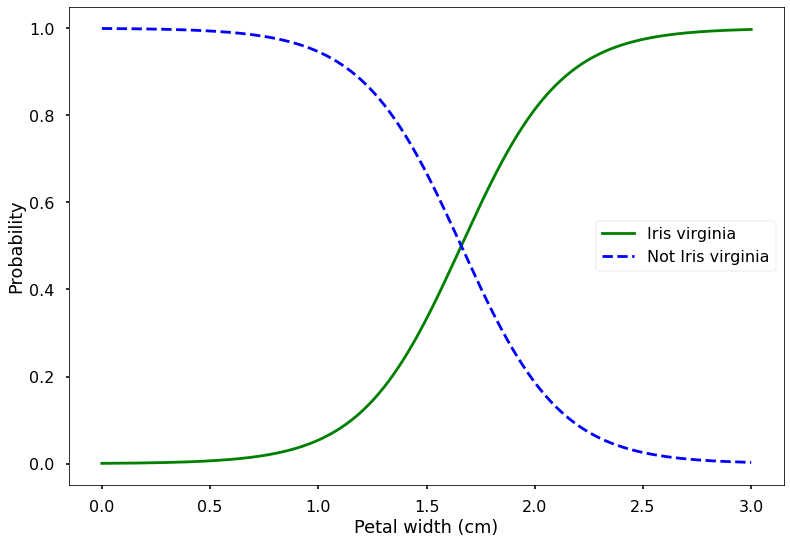

In [24]:
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginia")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginia")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Petal width (cm)')
plt.show()